In [1]:
import pandas as pd
from sklearn import svm
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
sns.set(color_codes=True)

In [2]:
data =pd.read_pickle('final_dataframe.pkl')
data.head()

#using only summer months
#filtering only summer (June -September)
data = data[~(data.index.month > 9)]  #removing months greater than September (month 9)
data = data[~(data.index.month < 6)] #removing months less than July (month 6)
data.head()

,Flattened_olr,Amplitude,MISO1,MISO2,Phase
1998-06-01,"[205.81, 205.81, 205.81, 205.81, 205.81, 205.8...",1.027046,-1.052428,0.049217,0
1998-06-02,"[202.25, 202.25, 202.25, 202.25, 202.25, 202.2...",0.952081,-0.956019,0.200926,0
1998-06-03,"[212.9, 212.9, 212.9, 212.9, 212.9, 212.9, 212...",0.879635,-0.868301,0.246973,0
1998-06-04,"[201.4, 201.4, 201.4, 201.4, 201.4, 201.4, 201...",0.784069,-0.739618,0.317908,0
1998-06-05,"[196.45, 196.45, 196.45, 196.45, 196.45, 196.4...",0.718819,-0.677253,0.293364,0


In [3]:
OLR = data.iloc[:,0]
Phase = data.iloc[:, 4]
MISO1 = data.iloc[:,2]
MISO2 = data.iloc[:,3]
Amplitude = data.iloc[:,1]


In [4]:
#Separating Training set and test set
msk = np.random.rand(len(OLR)) < 0.8
x_train = OLR[msk]
x_test = OLR[~msk]
y_train = Phase[msk]
y_test = Phase[~msk]


x_train_list = x_train.tolist()
x_test_list = x_test.tolist()
y_train_list= y_train.tolist()
y_test_list = y_test.tolist()

In [5]:
clf =svm.SVC(kernel = 'poly', coef0 = 3)
clf.fit(x_train_list, y_train_list)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=3,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
y_pred = clf.predict(x_test_list)

In [7]:
confusion_matrix =confusion_matrix(y_test_list, y_pred)

In [8]:
#Making a dataframe to compare predicted and actual class
comparision_df = pd.DataFrame(y_test)
comparision_df['Predicted_Phase']=y_pred
comparision_df =comparision_df.join(MISO1)
comparision_df = comparision_df.join(MISO2)
comparision_df = comparision_df.join(Amplitude)

comparision_df.head()

,Phase,Predicted_Phase,MISO1,MISO2,Amplitude
1998-06-10,0,0,-0.248288,0.369676,0.432358
1998-06-13,0,0,0.316368,0.031210,0.309884
1998-06-16,0,0,0.612276,-0.083858,0.602372
1998-06-17,0,0,0.673855,-0.161064,0.675184
1998-06-19,0,0,0.644472,-0.425459,0.751470


In [9]:

#Collecting Incorrectly Predicted Data
incorrectly_predicted = comparision_df[~(comparision_df.Phase == comparision_df.Predicted_Phase)]
incorrectly_predicted.head()

,Phase,Predicted_Phase,MISO1,MISO2,Amplitude
1998-08-07,0,8,-0.815027,-1.281323,1.474181
1998-08-18,5,0,-1.161777,1.517478,1.856167
1998-08-20,5,3,-0.607083,1.557297,1.621093
1998-08-21,5,4,-0.214877,1.576808,1.542408
1998-08-31,2,0,1.994492,-0.323374,1.969384


In [10]:
incorrectly_predicted.describe()

,Phase,Predicted_Phase,MISO1,MISO2,Amplitude
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.709677,2.612903,0.151396,-0.210011,2.112609
std,2.721016,3.014574,1.711872,1.546008,0.762831
min,0.000000,0.000000,-4.324171,-3.594669,0.230953
25%,1.000000,0.000000,-1.250489,-1.281323,1.653111
50%,3.000000,1.000000,0.091312,-0.217109,2.062807
75%,6.000000,5.000000,1.553534,0.976013,2.488928
max,8.000000,8.000000,3.381321,2.989867,4.291802


In [11]:
#Collecting Correctly Predicted Data
correctly_predicted = comparision_df[~(comparision_df.Phase != comparision_df.Predicted_Phase)]
correctly_predicted.head()


,Phase,Predicted_Phase,MISO1,MISO2,Amplitude
1998-06-10,0,0,-0.248288,0.369676,0.432358
1998-06-13,0,0,0.316368,0.031210,0.309884
1998-06-16,0,0,0.612276,-0.083858,0.602372
1998-06-17,0,0,0.673855,-0.161064,0.675184
1998-06-19,0,0,0.644472,-0.425459,0.751470


In [14]:
#Got this code from sklearn confusion matrix documentation
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




Confusion matrix, without normalization
[[147   3   3   0   1   2   1   4   1]
 [  3  20   0   0   0   0   0   0   6]
 [  9   1  22   3   0   0   0   0   0]
 [  3   3   2  24   2   1   0   0   0]
 [  5   0   1   2  15   1   0   0   0]
 [  5   0   0   1   1  17   1   0   0]
 [  2   0   0   0   0   1  20   2   0]
 [  8   0   0   0   0   1   0  12   4]
 [  4   4   0   0   0   0   0   2  23]]


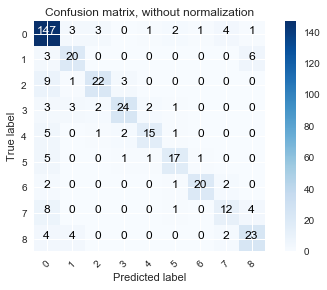

In [15]:

# Plot non-normalized confusion matrix
plt.figure()


plot_confusion_matrix(confusion_matrix, classes=['0','1','2','3','4','5','6','7','8'],title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix
[[ 0.90740741  0.01851852  0.01851852  0.          0.00617284  0.01234568
   0.00617284  0.02469136  0.00617284]
 [ 0.10344828  0.68965517  0.          0.          0.          0.          0.
   0.          0.20689655]
 [ 0.25714286  0.02857143  0.62857143  0.08571429  0.          0.          0.
   0.          0.        ]
 [ 0.08571429  0.08571429  0.05714286  0.68571429  0.05714286  0.02857143
   0.          0.          0.        ]
 [ 0.20833333  0.          0.04166667  0.08333333  0.625       0.04166667
   0.          0.          0.        ]
 [ 0.2         0.          0.          0.04        0.04        0.68        0.04
   0.          0.        ]
 [ 0.08        0.          0.          0.          0.          0.04        0.8
   0.08        0.        ]
 [ 0.32        0.          0.          0.          0.          0.04        0.
   0.48        0.16      ]
 [ 0.12121212  0.12121212  0.          0.          0.          0.          0.
   0.06060606  0.6969697 ]]

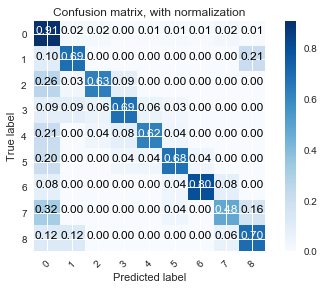

In [16]:
# Plot normalized confusion matrix
plt.figure()


plot_confusion_matrix(confusion_matrix, classes=['0','1','2','3','4','5','6','7','8'],title='Confusion matrix, with normalization', normalize= True)
plt.show()

In [17]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=3,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)